In [1]:
pwd

'C:\\Users\\admin\\Desktop\\Personal_stuff\\PROJECTS\\Proj2_Price model'

In [2]:
#Import and load the libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Data Wrangling

In [3]:
#Loading the dataset with a function
def wrangle (filepath):
    #Load the CSV file into file path-local function applied
    df = pd.read_csv(filepath, encoding='ISO-8859-1')
    #To display 'Capital Federal' only 
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    #To display 'Apartment' only 
    mask_apt = df["property_type"] == "apartment" 
    #To display price below'400,000'
    mask_price = df["price_aprox_usd"] < 400_000
    #Subset
    df = df[ mask_ba & mask_apt & mask_price]
    
    #Remove outliers by 'surface_area_m2' -----removing the 10th and 90th quantiles
    low = df["surface_covered_in_m2"].quantile(0.1)
    high = df["surface_covered_in_m2"].quantile(0.9)
    
    mask_area = df["surface_covered_in_m2"].between(low, high)
    
    df = df[mask_area]
    
    print('low = ', low, ';high = ', high)
    print('df.shape = ', df.shape)
    
    return df

In [4]:
# Load the CSV file into the filepath 
df = wrangle("C:\\Users\\admin\\Desktop\\Personal_stuff\\PROJECTS\\Proj2_Price model/buenos-aires-real-estate-1.csv")
print("df shape:", df.shape)
df.head()
df.info()

low =  31.0 ;high =  100.0
df.shape =  (1343, 17)
df shape: (1343, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 4 to 8604
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1343 non-null   int64  
 1   operation                   1343 non-null   object 
 2   property_type               1343 non-null   object 
 3   place_with_parent_names     1343 non-null   object 
 4   lat-lon                     1300 non-null   object 
 5   price                       1343 non-null   float64
 6   currency                    1343 non-null   object 
 7   price_aprox_local_currency  1343 non-null   float64
 8   price_aprox_usd             1343 non-null   float64
 9   surface_total_in_m2         965 non-null    float64
 10  surface_covered_in_m2       1343 non-null   float64
 11  price_usd_per_m2            927 non-null    float64
 12  price_per_m2       

The above information has been modelled within the function to only have the state of Capital Federal containing apartments below 400,000 USD. 

## Scatterplot created with matplotlib
Finding a relationship between apartment size and price

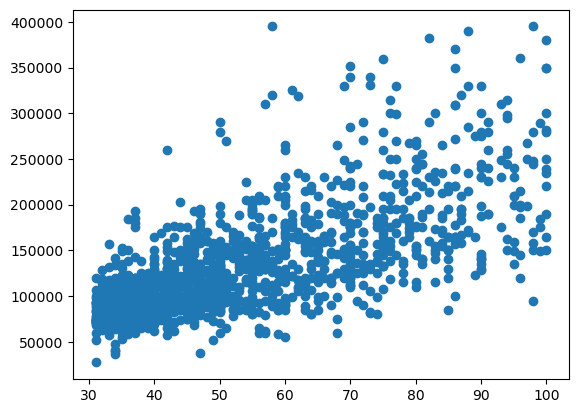

In [5]:
plt.scatter(x=df["surface_covered_in_m2"], y=df["price_aprox_usd"])
plt.xlabel = "Area [sq meters]"
plt.ylabel = "Price [USD]"
plt.title = "Area_m2 vs Price_usd"

### Scatter plot created with pandas

<Axes: title={'center': 'Area_m2 vs Price_usd'}, xlabel='Area [sq meters]', ylabel='Price [USD]'>

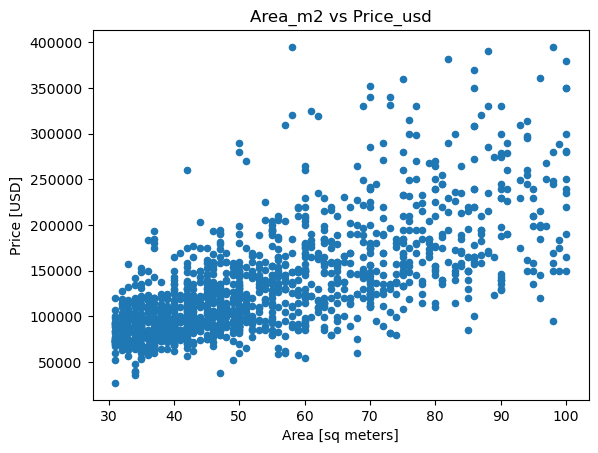

In [6]:
df.plot(x="surface_covered_in_m2",
        y="price_aprox_usd",
    kind="scatter",
    xlabel = "Area [sq meters]",
    ylabel = "Price [USD]",
    title= "Area_m2 vs Price_usd"
)

There is a strong co-relation between the price and surface area covered in m2 for apartments costing less than 400,000 usd in Capital Federal state.

In [7]:
#Creating a copy of the dataframe for manipulation
dfcopy = df.copy()

In [8]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 4 to 8604
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1343 non-null   int64  
 1   operation                   1343 non-null   object 
 2   property_type               1343 non-null   object 
 3   place_with_parent_names     1343 non-null   object 
 4   lat-lon                     1300 non-null   object 
 5   price                       1343 non-null   float64
 6   currency                    1343 non-null   object 
 7   price_aprox_local_currency  1343 non-null   float64
 8   price_aprox_usd             1343 non-null   float64
 9   surface_total_in_m2         965 non-null    float64
 10  surface_covered_in_m2       1343 non-null   float64
 11  price_usd_per_m2            927 non-null    float64
 12  price_per_m2                1343 non-null   float64
 13  floor                       379 n

In [9]:
dfcopy.shape

(1343, 17)

### Creating a feature matrix and Target Vector

In [10]:
#Feature Matrix
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.head()

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0


In [11]:
#Target Vector
target = "price_aprox_usd"
y_train =df[target]
y_train.head()
#y_train.shape  #demonstrates its a vector 

4     129000.0
9      87000.0
29    118000.0
40     57000.0
41     90000.0
Name: price_aprox_usd, dtype: float64

## Building a baseline model

In [12]:
#Calculate and assign the mean of y to the trained set
y_mean = y_train.mean()
y_mean

135527.83871928515

In [13]:
#Create a list of y_pred_baseline
y_pred_baseline = [y_mean] * len(y_train)
len(y_pred_baseline) == len(y_train)

True

In [14]:
#Get the X_train values only 
X_train.values[:5]

array([[70.],
       [42.],
       [54.],
       [42.],
       [50.]])

TypeError: 'str' object is not callable

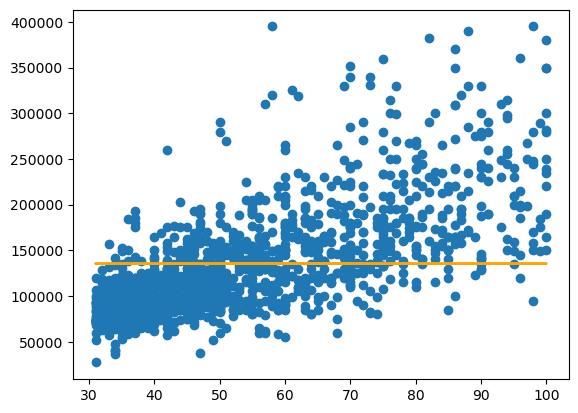

In [15]:
##Create a scatterplot with matplotlib
plt.plot(X_train.values, y_pred_baseline, color="Orange", label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

In [16]:
##calculate the mean absolute error
MAE_baseline = mean_absolute_error(y_train,  y_pred_baseline)
print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(MAE_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


The above demonstrates that the model has an mean absolute error of 45199.46 USD for which the model to be built will have to negate the amount in USD for a good working model

## Iterate

In [17]:
#Instantiate the model
model = LinearRegression()

In [18]:
#fit the modelto the training set
model.fit(X_train, y_train)

LinearRegression()

In [21]:
#Predict with the model
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

In [23]:
MAE_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(MAE_training, 2))

Training MAE: 31248.26


From the Training MAE, the result is less than the aforementioned baseline MAE that was earlier got when building the model by more than 10,000.
This is illustrated with the following : Baseline MAE: (+)45199.46 in comparison to Training MAE: (+)31248.26
Diff: (-)13,951.2

In [43]:
#test set
X_test = pd.read_csv("buenos-aires-test-features.csv", encoding = "ISO-8859-1")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    117330.058901
1    135355.037823
2     88039.468152
3     88039.468152
4    106064.447074
dtype: float64

In [44]:
#Calculate the intercept of the trained model
intercept = round(model.intercept_)
print ("The intercept is:", intercept)
#the assert function is to ensure that a numeric value is generated and should be expected before exec. of the code|
assert any([isinstance(intercept, int), isinstance(intercept, float)])

The intercept is: 11433


In [45]:
#Calculate the coefficient and rounded up to 2 d.p
coefficient = round(model.coef_[0], 2)
print("The coeffient in this case is:", coefficient)

The coeffient in this case is: 2253.12


In [47]:
#Formulating the equation using f string 
print(F" price_usd = {intercept} + {coefficient} * surface_covered")


 price_usd = 11433 + 2253.12 * surface_covered


From the above the equation of a line is formed where Equation: y = beta 0 + beta 1 * x


TypeError: 'str' object is not callable

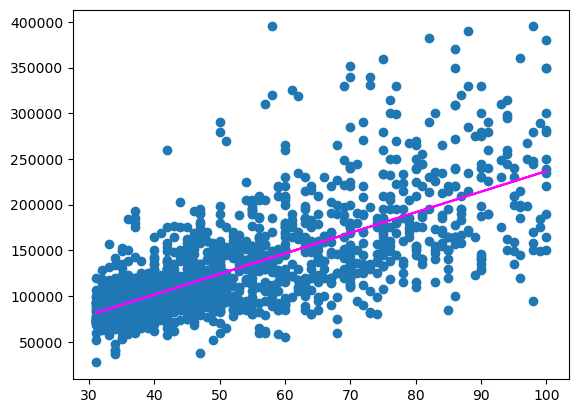

In [48]:
##Create a scatterplot with the trained linear model
plt.plot(X_train.values, model.predict(X_train), color="Magenta", label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

The model has been trained and fits better with the dataset above.